## Packages

In [1]:
require(xcms)
require(tidyverse)
require(stringr)
require(forcats)
require(janitor)
require(ecipex)
require(viridis)

Loading required package: xcms
Loading required package: mzR
Loading required package: Rcpp
Warning message in fun(libname, pkgname):
“mzR has been built against a different Rcpp version (0.12.11)
than is installed on your system (0.12.13). This might lead to errors
when loading mzR. If you encounter such issues, please send a report,
including the output of sessionInfo() to the Bioc support forum at 
https://support.bioconductor.org/. For details see also
https://github.com/sneumann/mzR/wiki/mzR-Rcpp-compiler-linker-issue.”Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:b

## `xcms` comparison of unlabeled and labeled samples

In [2]:
setwd('~/Box/2018_D2O_manuscript/jupyter/')
file_info <- read_csv('../mzml_files/homoharringtonine_case_study/sample_descriptions.csv')

Parsed with column specification:
cols(
  sample_id = col_character(),
  label = col_character(),
  growth_time = col_character(),
  tissue_type = col_character()
)


In [3]:
file_info <-
    file_info %>%
    mutate(full_name = list.files(path='../mzml_files/homoharringtonine_case_study', 
                                  pattern='*.mzML',
                                  full.names = T)
          )

my_files <-
    file_info %>%
    filter(str_detect(full_name, sample_id)) %>%  # check that full_names match sample_ids
    filter(growth_time %in% c('30 days', '46 days'), tissue_type == 'new growth') %>%
    pull(full_name)

In [4]:
file_info

sample_id,label,growth_time,tissue_type,full_name
180410-KS-I-9-D1,D2O,14 days,new growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-D1.mzML
180410-KS-I-9-D2,D2O,14 days,new growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-D2.mzML
180410-KS-I-9-D3,D2O,14 days,new growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-D3.mzML
180410-KS-I-9-Dnew-1,D2O,21 days,new growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-Dnew-1.mzML
180410-KS-I-9-Dnew-2,D2O,21 days,new growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-Dnew-2.mzML
180410-KS-I-9-Dnew-3,D2O,21 days,new growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-Dnew-3.mzML
180410-KS-I-9-Dold-1,D2O,21 days,old growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-Dold-1.mzML
180410-KS-I-9-Dold-2,D2O,21 days,old growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-Dold-2.mzML
180410-KS-I-9-Dold-3,D2O,21 days,old growth,../mzml_files/homoharringtonine_case_study/180410-KS-I-9-Dold-3.mzML
180412-KS-I-9-control-1,H2O,30 days,new growth,../mzml_files/homoharringtonine_case_study/180412-KS-I-9-control-1.mzML


In [5]:
# xset <- xcmsSet(my_files, 
#                 method = "centWave", 
#                 ppm = 10, 
#                 mzdiff = -0.001, 
#                 peakwidth = c(7.5, 45))

In [6]:
# save(xset, file = 'saved_data/homoharringtonine_xset.rdat')
load('saved_data/homoharringtonine_xset.rdat')

In [7]:
sampclass(xset)

my_classes <- 
    file_info %>%
    filter(str_detect(full_name, sample_id)) %>%  # check that full_names match sample_ids
    filter(growth_time %in% c('30 days', '46 days'), tissue_type == 'new growth') %>%
    pull(label) %>%
    as.character
    
sampclass(xset) <- my_classes

sampclass(xset)

[1] homoharringtonine_case_study homoharringtonine_case_study
[3] homoharringtonine_case_study homoharringtonine_case_study
[5] homoharringtonine_case_study homoharringtonine_case_study
Levels: homoharringtonine_case_study

[1] H2O H2O H2O D2O D2O D2O
Levels: H2O D2O

In [8]:
# xset.grgf <- 
#     xset %>% 
#     group(bw = 0.25, mzwid = 0.00538) %>%
#     fillPeaks

In [9]:
# save(xset.grgf, file = 'saved_data/homoharringtonine_xset.grgf.rdat')
load('saved_data/homoharringtonine_xset.grgf.rdat')

In [10]:
xset.grgf

An "xcmsSet" object with 6 samples

Time range: 4.5-1979.4 seconds (0.1-33 minutes)
Mass range: 55.0176-1696.2442 m/z
Peaks: 86314 (about 14386 per sample)
Peak Groups: 10711 
Sample classes: H2O, D2O 

Peak picking was performed on MS1.
Profile settings: method = bin
                  step = 0.1

Memory usage: 9.18 MB

## Pairwise comparison of features to identify labeled metabolites

In [11]:
feature_table <-
    diffreport(xset.grgf, class1='H2O', class2='D2O')

Loading required package: multtest
Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 8,36,48,50,103,110,271,348,413,421,529,926,937,1392,1504,1600,1710,1887,1913,2045,2214,2289,2496,2498,2505,2507,2525,2528,2824,2858,2975,2996,3195,3214,3296,3300,3496,3503,3641,3643,3658,3734,3736,3799,4053,4068,4204,4328,4358,4467,4529,4570,4590,4597,4599,4915,4965,5049,5103,5109,5145,5199,5242,5287,5305,5641,5822,5839,5901,6009,6239,6242,6247,6248,6267,6317,6357,6384,6394,6413,6605,6606,6630,6638,6639,6643,6671,6837,6857,6905,7233,7239,7476,7496,7526,7531,7691,7776,7833,7926,7950,7984,7987,8013,8068,8227,8457,8699,8701,8703,8710,8758,8859,8872,8914,8928,8942,8950,9122,9352,9360,9367,9376,9382,9647,9793,9824,10202,10242,10250,10284,10588,10624 --> row.names NOT used”

In [12]:
data_cols <- 
    feature_table %>%
    names %>%
    {. %in% (file_info %>% pull(sample_id))} %>%
    which

long_table <-
    feature_table %>%
    gather(sample_id, intensity, data_cols) %>%
    left_join(file_info, by=c('sample_id')) %>%
    select(name, fold, tstat, pvalue, mzmed, rtmed, sample_id, label, intensity)

filtered_table <-
    long_table %>%
    group_by(name, fold, tstat, pvalue, mzmed, rtmed) %>%
    mutate(max_intensity = max(intensity)) %>%
    arrange(name) %>% 
    filter(max_intensity > 30000, rtmed > 180, rtmed < 1300) %>%
    arrange(-fold)

summary_table <-
    filtered_table %>%
    group_by(name, fold, tstat, pvalue, mzmed, rtmed, max_intensity, label) %>%
    summarize(mean_intensity = mean(intensity)) %>%
    spread(label, mean_intensity)
    

In [13]:
n_feat <- filtered_table %>% filter(mzmed <= 700) %>% pull(name) %>% unique %>% length

n_feat * (n_feat -1) / 2

n_feat

[1] 1563796

[1] 1769

Thus, there are 1769 features, and 1,563,796 feature pairs considered in this analysis. 

In [14]:
summary_table %>% head
summary_table %>% dim

name,fold,tstat,pvalue,mzmed,rtmed,max_intensity,D2O,H2O
M1013T551,3.655129,-10.8584841,0.001065772,1013.270,550.8630,66170.98,16856.17,61611.47
M1014T549,1.061625,0.2277936,0.831848485,1014.274,548.6230,53387.52,39882.77,37567.66
M1015T547,3.159608,3.9254515,0.050876720,1015.280,546.9710,52756.07,40400.21,12786.46
M1025T837,5.457970,-2.3778881,0.140136690,1025.460,837.0215,250458.93,27214.40,148535.37
M1026T836,1.503680,-0.9637558,0.431157618,1026.466,836.4460,151778.50,59967.96,90172.61
M1027T837,2.015159,2.7425298,0.067854804,1027.467,836.8890,77927.90,66120.20,32811.41


[1] 1973    9

The summary table doesn't yet apply the m/z filter of <= 700 Da; this is done below.

In [15]:
D_NEUTRON <- ecipex('H')[[1]]$mass %>% diff
mass_diffs <- outer(c(1, 2, 3, 4), D_NEUTRON
                   ) %>% as.numeric %>% sort

mass_diffs

diff_ppm <- 10

[1] 1.006277 2.012553 3.018830 4.025107

In [16]:
# find feature pairs with the same RT and 
# m/z values differing by a integer multiple of D_NEUTRON mass
feature_pairs <-
    summary_table %>%
        ungroup %>%
        mutate(foo = 1) %>%
        mutate(mzmed <= 700) %>%   # focus on small molecules
        left_join(., ., by='foo') %>%  # form all feature pairs
        filter(mzmed.x < mzmed.y,  # ".x" is light feature, ".y" is heavy
               abs(rtmed.x - rtmed.y) <= 3,  # features must coelute
               sign(tstat.x) != sign(tstat.y)) %>%  # and change in opposite direction
        rowwise %>%
        mutate(mz_diff = abs(mzmed.x - mzmed.y), 
               # mz_diff must be within tolerance of integer D_NEUTRONS
               ppm = min(abs(mz_diff - mass_diffs) / mzmed.x * 1e6)) %>% 
        select(name.x, name.y, 
               mzmed.x, mzmed.y, 
               rtmed.x, rtmed.y,
               fold.x, fold.y,
               pvalue.x, pvalue.y,
               tstat.x, tstat.y,
               mz_diff, ppm,
               max_intensity.x, max_intensity.y, 
               H2O.x, H2O.y, D2O.x, D2O.y) %>%
        filter(ppm <= diff_ppm) %>%
        arrange(-fold.y) 


In [17]:
kept_features <- feature_pairs %>%
    filter(fold.y > 3, mzmed.y <= 700) %>%
    mutate(scorer = sqrt(rank(fold.y / mzmed.x) * rank(max_intensity.x))) %>%
    arrange(-scorer) %>%
    pull(name.x) %>%
    unique %>%
    head(20) 

kept_features

[1] M502T837_1  M516T931_1  M530T1065_1 M611T848_1  M433T969_1  M633T848   
 [7] M619T1106   M205T219    M595T920    M538T932    M536T876_1  M449T970   
[13] M532T628    M517T931_1  M667T1131   M532T574_1  M449T952    M163T380   
[19] M139T631    M310T1106_1
10711 Levels: M1001T1483 M1001T1486 M1007T1484 M1007T870 M1008T1486 ... M99T81

In [18]:
top_20_hits <-
    feature_table %>%
    filter(name %in% kept_features) %>%
    select(name, mz=mzmed, rtmed) %>%
    arrange(mz)

top_20_hits 

top_20_hits %>%
    write_csv('saved_data/top_20_labeled_features_homoharringtonine.csv')

top_20_hits_manual <- read_csv('saved_data/top_20_labeled_features_homoharringtonine_manual_annot.csv')

top_hit_names <- 
    top_20_hits_manual %>%
    na.omit() %>%
    pull(name)

top_hit_names

name,mz,rtmed
M139T631,139.0390,630.7015
M163T380,163.0389,379.8600
M205T219,205.0971,219.3525
M310T1106_1,310.1414,1106.3855
M433T969_1,433.1128,969.0695
M449T970,449.1078,969.8895
M449T952,449.1081,951.5760
M502T837_1,502.2441,837.0370
M516T931_1,516.2601,931.2800
M517T931_1,516.5476,930.5555


Parsed with column specification:
cols(
  name = col_character(),
  mz = col_double(),
  rtmed = col_double(),
  manual_rt_min = col_double(),
  manual_rt_max = col_double(),
  manual_span = col_integer(),
  charge = col_integer(),
  formula = col_character()
)


[1] "M139T631"    "M163T380"    "M205T219"    "M310T1106_1" "M433T969_1" 
[6] "M449T970"    "M449T952"    "M502T837_1"  "M516T931_1"

Warning message:
“Removed 73 rows containing missing values (geom_point).”

Warning message in dir.create("~/Box/2018_D2O_manuscript/figures/untarg_analysis"):
“'/Users/curt/Box/2018_D2O_manuscript/figures/untarg_analysis' already exists”Warning message:
“Removed 73 rows containing missing values (geom_point).”

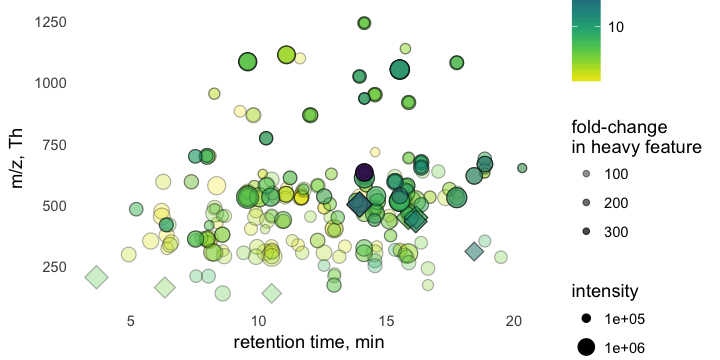

In [19]:
options(repr.plot.width=6, repr.plot.height=3)
feature_pairs %>%
    mutate(is_top_hit = name.x %in% top_hit_names) %>%
    arrange(fold.y) %>%
    ggplot(aes(x=rtmed.x/60, 
               y=mzmed.x, 
               fill=fold.y, 
               size=max_intensity.x, 
               alpha=fold.y,
               shape=is_top_hit)) +
        geom_point() +
        scale_shape_manual(values = c(21, 23), guide=guide_legend('none')) +
        scale_alpha_continuous(name = 'fold-change\nin heavy feature', range=c(0.3, 0.8)) +
        scale_fill_viridis(direction = -1, name = 'fold-change\nin heavy feature', trans = 'log10') +
        scale_color_continuous(name = 'fold-change\nin heavy feature') +
        scale_size_continuous(range = c(2, 6), limits=c(1e5, 1e8), name = 'intensity', trans='log10') +
        theme_minimal() +
        theme(panel.grid = element_blank()) +
        ylab('m/z, Th') +
        xlab('retention time, min')

dir.create('~/Box/2018_D2O_manuscript/figures/untarg_analysis')
ggsave('~/Box/2018_D2O_manuscript/figures/untarg_analysis/xcms_plot.pdf', width=6, height=3)

The plot above is essentially a subigure in the paper. The version in the paper has been lightly edited in Illustrator to clean up legends, etc.

In [20]:
top_hits <- feature_pairs %>%
    mutate(is_top_hit = name.x %in% top_hit_names) %>%
    filter(is_top_hit) %>%
    ungroup %>%
    select(name.x, mzmed.x, rtmed.x) %>%
    distinct %>%
    mutate(rtmed = rtmed.x / 60) %>%
    select(-rtmed.x) %>%
    arrange(mzmed.x)

top_hits

name.x,mzmed.x,rtmed
M139T631,139.0390,10.511692
M163T380,163.0389,6.331000
M205T219,205.0971,3.655875
M310T1106_1,310.1414,18.439758
M433T969_1,433.1128,16.151158
M449T970,449.1078,16.164825
M449T952,449.1081,15.859600
M502T837_1,502.2441,13.950617
M516T931_1,516.2601,15.521333
